# Pymaceuticals Inc.
---

### Analysis

- Three observations of the data:

1. Mean tumor volume (mm3) ranged from 40.2-54.3 while the median tumor volume ranged from 40.7-53.7.

2. The number of observed time points varied by treatment with Capomulin and Ramicane have the highest number of observed  time points and Propriva having the lowest number of observed time points.

3. There was approximately an equal number of male versus female mice in the study (50.4% versus 49.6%)
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combined_data

#RESOURCE: 
# https://www.geeksforgeeks.org/how-to-merge-two-csv-files-by-specific-column-using-pandas-in-python/

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
number_mice = mouse_metadata["Mouse ID"].count()
number_mice


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_by_ID = combined_data[combined_data.duplicated()]

import numpy as np
array = np.array(duplicate_mice_by_ID)
array

#RESOURCE: https://pythonguides.com/how-to-find-duplicates-in-python-dataframe/
#RESOURCE for array formula:  https://datagy.io/python-count-unique-values-list/

array([['g989', 0, 45.0, 0, 'Propriva', 'Female', 21, 26]], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mice_by_ID.count
duplicate_mice = combined_data [combined_data.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"] 
duplicate_mice.head()

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_data = combined_data.loc[combined_data["Mouse ID"]!= "g989"]
new_combined_data

clean_df = pd.DataFrame(new_combined_data[['Mouse ID','Timepoint','Tumor Volume (mm3)', 'Metastatic Sites',
                'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']])
clean_df

#RESOURCE: https://datagy.io/pandas-data-cleaning/

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count=new_combined_data["Mouse ID"].value_counts()
mice_count = len(mice_count)
mice_count


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drug_regimen= new_combined_data.groupby("Drug Regimen")
per_drug_regimen_mean = grouped_drug_regimen["Tumor Volume (mm3)"].mean()
per_drug_regimen_mean

per_drug_regimen_median = grouped_drug_regimen["Tumor Volume (mm3)"].median()
per_drug_regimen_median

per_drug_regimen_var = grouped_drug_regimen["Tumor Volume (mm3)"].var()
per_drug_regimen_var

per_drug_regimen_std=grouped_drug_regimen["Tumor Volume (mm3)"].std()
per_drug_regimen_std

per_drug_regimen_sem=grouped_drug_regimen["Tumor Volume (mm3)"].sem()
per_drug_regimen_sem

#summary_statistics
summarydata = pd.DataFrame({"Mean Tumor Volume": per_drug_regimen_mean,
                            "Median Tumor Volume":per_drug_regimen_median, 
                            "Tumor Volume Variance": per_drug_regimen_var,
                            "Tumor Volume Std. Dev.":per_drug_regimen_std, 
                            "Tumor Volume Std. Err.":per_drug_regimen_sem})
summarydata

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"])
summary_stats_table

##MISSING TUMOR VOLUME (mm3) at top of table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
#name of drugs
clean_df["Drug Regimen"].unique()
drug_names=clean_df["Drug Regimen"].unique()
drug_names


array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [12]:
#count of time points
timepoint_counts = combined_data.groupby("Drug Regimen").count()
timepoint_counts['Timepoint']
stored_timepoint_counts=timepoint_counts['Timepoint']
stored_timepoint_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

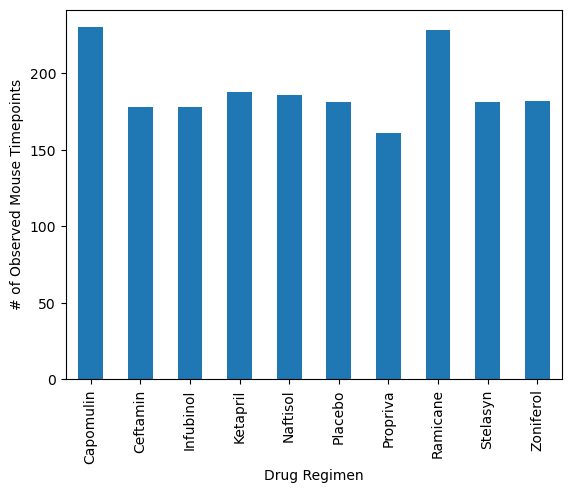

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
plt.ylabel("# of Observed Mouse Timepoints")
stored_timepoint_counts.plot(kind = "bar")


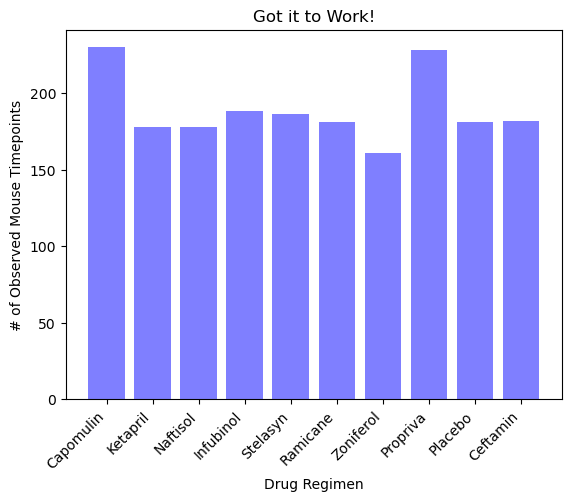

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import numpy as np
import matplotlib.pyplot as plt

x_axis = drug_names
tick_locations = [value for value in x_axis]
plt.xticks(rotation=45, ha='right')
y_axis = timepoint_counts['Timepoint']
plt.title("Got it to Work!")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, y_axis, color ='b',alpha=0.5,align='center')
plt.show()


In [15]:
mouse_metadata["Sex"].value_counts()
#array([['g989', 0, 45.0, 0, 'Propriva', 'Female', 21, 26]], dtype=object)
#Male =125  Female = 123

Male      125
Female    124
Name: Sex, dtype: int64

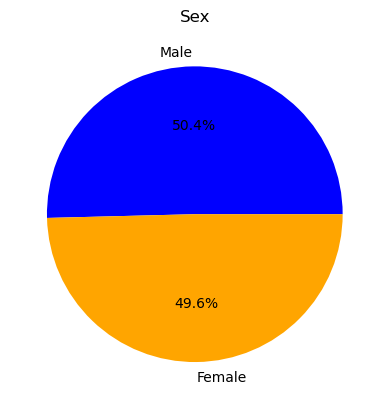

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#pies = ["Apple", "Pumpkin", "Chocolate Creme", "Cherry", "Apple Crumb", "Pecan", "Lemon Meringue", "Blueberry", "Key Lime", "Peach"]
#pie_votes = [47,37,32,27,25,24,24,21,18,16]
#colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
#plt.pie(pie_votes, labels=pies, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = ["Male","Female"]
sizes = [125,123]
colors = ["blue","orange"]
plt.pie(sizes, labels=labels,colors=colors,
        autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Start by getting the last (greatest) timepoint for each mouse
last_time_point =clean_df.drop_duplicates(subset=['Mouse ID'],keep='last')
last_time_point.reset_index()
last_time_point2=last_time_point.reset_index()
last_time_point2
group_by_drug=last_time_point2.groupby("Drug Regimen").head()
group_by_drug

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1,f932,0,45.000000,0,Ketapril,Male,15,29
1,20,x336,0,45.000000,0,Naftisol,Female,4,29
2,53,h428,0,45.000000,0,Ketapril,Female,1,27
3,55,v199,0,45.000000,0,Naftisol,Female,17,29
4,109,o848,0,45.000000,0,Stelasyn,Female,14,27
5,135,d133,0,45.000000,0,Zoniferol,Male,5,30
6,155,l872,0,45.000000,0,Placebo,Male,19,30
7,182,u153,0,45.000000,0,Ceftamin,Female,11,25
8,194,b447,0,45.000000,0,Ceftamin,Male,2,30
9,198,n482,0,45.000000,0,Propriva,Female,4,29


In [18]:
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time_point2.merge(clean_df, how='inner', on=['Mouse ID', 'Timepoint'])
new_data_df=last_time_point2.merge(clean_df, how='inner', on=['Mouse ID', 'Timepoint'])
new_data_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,1,f932,0,45.000000,0,Ketapril,Male,15,29,45.000000,0,Ketapril,Male,15,29
1,20,x336,0,45.000000,0,Naftisol,Female,4,29,45.000000,0,Naftisol,Female,4,29
2,53,h428,0,45.000000,0,Ketapril,Female,1,27,45.000000,0,Ketapril,Female,1,27
3,55,v199,0,45.000000,0,Naftisol,Female,17,29,45.000000,0,Naftisol,Female,17,29
4,109,o848,0,45.000000,0,Stelasyn,Female,14,27,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1888,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521,2,Capomulin,Male,12,25
244,1889,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923,3,Capomulin,Male,18,17
245,1890,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892,1,Ceftamin,Female,11,26
246,1891,x773,45,58.634971,4,Placebo,Female,21,30,58.634971,4,Placebo,Female,21,30


In [19]:
top_drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
top_drugs

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [47]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments =["Capomulin", "Ketapril", "Naftisol", "Infubinol", "Stelasyn",
       "Ramicane", "Propriva", "Zoniferol", "Placebo", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_Capomulin=[]
tumor_vol_data_Ramicane=[]
tumor_vol_data_Infubinol=[]
tumor_vol_data_Ceftamin=[]

#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that 
#correspond to each treatment. 
#Append the resulting final tumor volumes for each drug to the empty list.

#GOAL: Loop through the new_data_df, find rows with 4 drug names 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'
# and corresponding final tumor volume and store into tumor_vol_data

for row in new_data_df.index:
  if (new_data_df["Drug Regimen_x"][row]) == "Capomulin":
    tumor_vol_data_Capomulin.append(new_data_df["Tumor Volume (mm3)_x"][row])

  if (new_data_df["Drug Regimen_x"][row]) == "Ramicane":
    tumor_vol_data_Ramicane.append(new_data_df["Tumor Volume (mm3)_x"][row]) 
  
  if (new_data_df["Drug Regimen_x"][row]) == "Infubinol":
    tumor_vol_data_Infubinol.append(new_data_df["Tumor Volume (mm3)_x"][row]) 

  if (new_data_df["Drug Regimen_x"][row]) == "Ceftamin":
    tumor_vol_data_Ceftamin.append(new_data_df["Tumor Volume (mm3)_x"][row]) 

tumor_vol_data_Capomulin
tumor_vol_data_Ramicane
tumor_vol_data_Infubinol
tumor_vol_data_Ceftamin

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#display interquartile range 

quartiles = np.quantile(tumor_vol_data_Capomulin, [0.25, .5, .75])
lowerq = quartiles[0]
upperq = quartiles[2]
iqr_Campomulin = upperq-lowerq
#iqr_Campomulin

print(f"The interquartile range for the Campomulin tumor volume is: {iqr}")
    
#Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Campomulin.")
print(f"Values above {upper_bound} could be outliers for Campomulin.")

The interquartile range for the Campomulin tumor volume is: 11.477135160000003
Values below 15.161654099999993 could be outliers for Campomulin.
Values above 57.374923040000006 could be outliers for Campomulin.


In [50]:
quartiles = np.quantile(tumor_vol_data_Ramicane, [0.25, .5, .75])
lowerq = quartiles[0]
upperq = quartiles[2]
iqr_Campomulin = upperq-lowerq
#iqr_Campomulin

print(f"The interquartile range for the Ramicane tumor volume is: {iqr}")
    
#Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ramicane.")
print(f"Values above {upper_bound} could be outliers for Ramicane.")

The interquartile range for the Ramicane tumor volume is: 15.577752179999997
Values below 8.193841280000004 could be outliers for Ramicane.
Values above 64.02563454 could be outliers for Ramicane.


In [46]:
quartiles = np.quantile(tumor_vol_data_Infubinol, [0.25, .5, .75])
quartiles
lowerq = quartiles[0]
upperq = quartiles[2]
iqr = upperq-lowerq

print(f"The interquartile range for the Infubinol tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Infubinol.")
print(f"Values above {upper_bound} could be outliers for Infubinol.")


The interquartile range for the Infubinol tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.


In [48]:
quartiles = np.quantile(tumor_vol_data_Ceftamin, [0.25, .5, .75])
quartiles
lowerq = quartiles[0]
upperq = quartiles[2]
iqr = upperq-lowerq

print(f"The interquartile range for the Ceftamin tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ceftamin.")
print(f"Values above {upper_bound} could be outliers for Ceftamin.")


The interquartile range for the Ceftamin tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


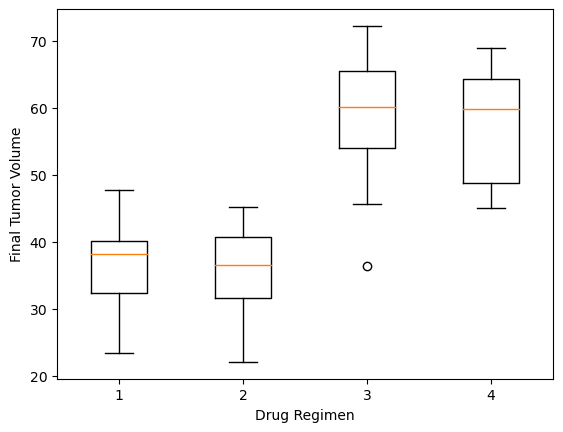

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([tumor_vol_data_Capomulin, tumor_vol_data_Ramicane, tumor_vol_data_Infubinol,tumor_vol_data_Ceftamin])
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume")
#tick_locations=[value for value in x_axis]
#plt.ticks(tick_locations, top_drugs)
plt.show()

## Line and Scatter Plots

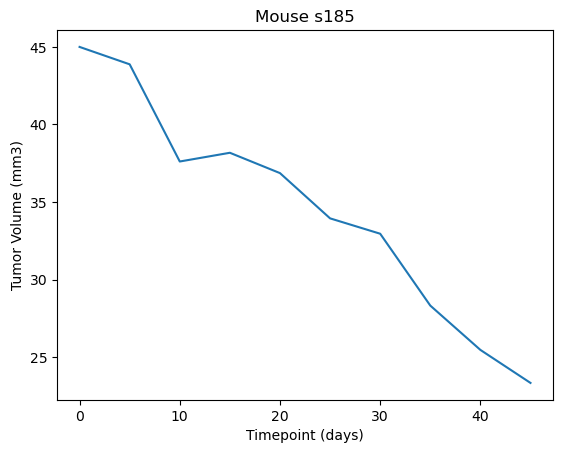

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
%matplotlib inline
mouse_tumor_vol=[]
mouse_timepoint =[]

for row in clean_df.index:
    if (clean_df["Mouse ID"][row]) == "s185":
        mouse_tumor_vol.append(clean_df["Tumor Volume (mm3)"][row])
        mouse_timepoint.append(clean_df["Timepoint"][row])

# Plot the line
plt.plot(mouse_timepoint, mouse_tumor_vol)
plt.title("Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


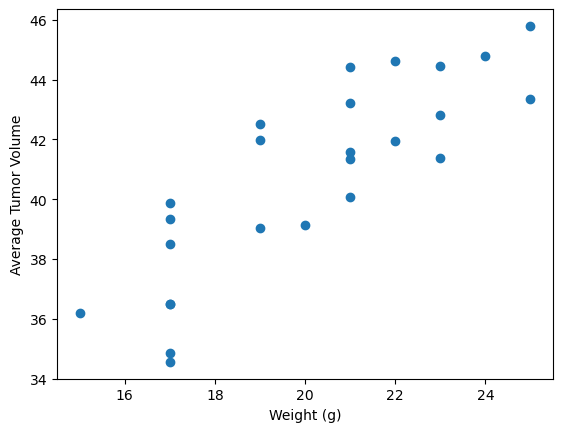

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_ID_Capomulin = []
mouse_weights = []
mouse_avg_volume=[]

for row in clean_df.index:
  if (clean_df["Drug Regimen"][row]) == "Capomulin"and (clean_df["Mouse ID"][row]) not in mouse_ID_Capomulin:
    mouse_ID_Capomulin.append(clean_df["Mouse ID"][row])

for mouse_ID in mouse_ID_Capomulin:
  sum=0
  count=0
  weight=0
  for row in clean_df.index:
    if (clean_df["Mouse ID"][row]) == mouse_ID:
        sum=clean_df["Tumor Volume (mm3)"][row]+sum
        count=count + 1
        weight=clean_df["Weight (g)"][row]

  ave_volume = sum / count

  mouse_weights.append(weight)
  mouse_avg_volume.append(ave_volume)

plt.scatter(mouse_weights, mouse_avg_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient between alcohol and color_intensity

from scipy.stats import linregress
import numpy as np

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, mouse_avg_volume)
#regress_values = float[mouse_weights] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The correlation coefficient between mouse weight and average observed tumor volume is {round(st.pearsonr(mouse_weights, mouse_avg_volume)[0],2)}")

The correlation coefficient between mouse weight and average observed tumor volume is 0.84
